/var/folders/bl/lg9fqllx6jx0kvmrmyxlbrw00000gn/T/ipykernel_57963/3320415319.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


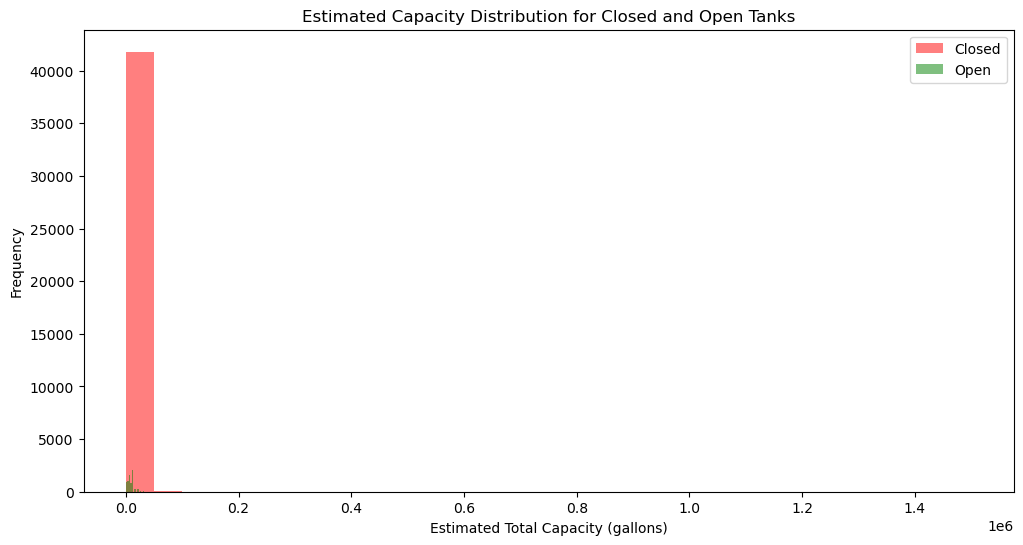

In [2]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = '/mnt/data/Underground_Storage_Tanks__USTs__-_Facility_and_Tank_Details.csv'
data = pd.read_csv(file_path)

# Convert 'Estimated Total Capacity (gallons)' to numeric, forcing errors to NaN
data['Estimated Total Capacity (gallons)'] = pd.to_numeric(data['Estimated Total Capacity (gallons)'], errors='coerce')

# Drop rows with NaN values in 'Estimated Total Capacity (gallons)' or 'Status of Tank'
data = data.dropna(subset=['Estimated Total Capacity (gallons)', 'Status of Tank'])

# Aggregate the data to sum capacities by tank status
capacity_summary = data.groupby('Status of Tank')['Estimated Total Capacity (gallons)'].sum().reset_index()

# Sort the data by capacity
capacity_summary = capacity_summary.sort_values(by='Estimated Total Capacity (gallons)', ascending=False)

# Create the interactive bar plot
fig = px.bar(capacity_summary,
             x='Status of Tank',
             y='Estimated Total Capacity (gallons)',
             title='Total Estimated Capacity by Tank Status',
             labels={'Status of Tank': 'Tank Status', 'Estimated Total Capacity (gallons)': 'Total Estimated Capacity (gallons)'},
             text='Estimated Total Capacity (gallons)')

# Update the layout for better readability
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  yaxis_title='Total Estimated Capacity (gallons)',
                  xaxis_title='Tank Status')

# Show the plot
fig.show()
